# Problem Set 3

In [63]:
import math
import numpy as np
from scipy.stats import norm 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set(font_scale=1.5, rc={'text.usetex' : True})

In [64]:
def indicator(arr,target_num):
    """
    transform array with indicator function
    target_num: indicator threshold
    """
    res = [i if i>target_num else 0 for i in arr]
    
    return res

def modify_negative_arr(arr,sqrt):
    """
    Modify array with negative value within root calculation by use its absolute value
    """
    res = []
    
    for num in arr:
        if num > 0:
            res.append(num**(1/sqrt))
        else:
            num = -(abs(num)**(1/sqrt))
            res.append(num)
    return res



def modify_negative_num(num,sqrt):
    """
    Modify array with negative value within root calculation by use its absolute value
    """

    if num > 0:
        return num**(1/sqrt)
    else:
        return -(abs(num)**(1/sqrt))


## 1. Evaluate the following expected values and probabilities:

In [65]:
def simulate_x1(x0,n,t,path):
    """
    x0: initial value
    n: steps
    t: time horizon
    path: number of simulations
    """
    np.random.seed(1)
    dt = t/n
    xt = [np.array([x0]*path)]
    for i in range(n):
        curr_x = xt.pop()
        new = curr_x + (1/5-1/2*curr_x)*dt + (2/3)*np.sqrt(dt)*np.random.normal(0,1,path)
        xt.append(new)
    return xt[0]

In [66]:
def simulate_y1(y0,n,t,path):
    """
    y0: initial value
    n: steps
    t: time horizon
    path: number of simulations
    """
    np.random.seed(0)
    dt = t/n
    yt = [np.array([y0]*path)]
    for i in range(n):
        curr_y = yt.pop()
        t = dt * (i +1 )
        new = curr_y + ((2/(1+t))*curr_y + (1+t**3)/3)*dt + (1+t**3)/3 * np.sqrt(dt) * np.random.normal(0,1,path)
        yt.append(new)
    return yt[0]

In [67]:
# x2 = simulate_x1(1,1000,2,1000)
# y2 = simulate_y1(0.75,1000,2,1000)
# y3 = simulate_y1(0.75,1000,3,1000)

In [68]:
def question_1(x0=1,y0=0.75):
    """
    Input: x0,y0
    Output: p1, e1, e2, e3
    """
    x2 = simulate_x1(x0,1000,2,1000)
    y2 = simulate_y1(y0,1000,2,1000)
    y3 = simulate_y1(y0,1000,3,1000)
    
    p1 = sum(y2>5)/len(y2)
    e1 = np.mean(modify_negative_arr(x2,3))
   
    e2 = np.mean(y3)
    new_x2 = indicator(x2,1)
    e3 = np.mean(list(map(lambda x,y: x*y, new_x2,y2)))
    
    return p1 , e1 , e2 , e3
    
q1 = question_1(x0=1,y0=0.75)     

In [69]:
idx = ['P(y2>5)', 'e1','e2','e3']
ans_1 = pd.DataFrame(list(zip(idx,q1)))
ans_1.columns=['Question','Answer']
ans_1

,Question,Answer
0,P(y2>5),0.978000
1,e1,0.645733
2,e2,26.309194
3,e3,3.893022


## 2. Estimate the following expected values:

In [70]:
def simulate_x2(x0,n,t,path):
    """
    x0: initial value
    n: steps
    t: time horizon
    path: number of simulations
    """
    #np.random.seed(1)
    dt = t/n
    xt = [np.array([x0]*path)]
    for i in range(n):
        curr_x = xt.pop()
        new = curr_x + (1/4)*curr_x*dt + (1/3)*curr_x*np.sqrt(dt)*np.random.normal(0,1,path)\
                                       -(3/4)*curr_x*np.sqrt(dt)*np.random.normal(0,1,path)
        xt.append(new)
        
    return xt[0]

In [71]:
def simulate_y2(t,path):
    """
    t: time horizon
    path: number of simulations
    """
    #np.random.seed(0)
    
    yt = np.exp(-0.08*t+(1/3)*np.sqrt(t)*np.random.normal(0,1,path)+(3/4)*np.random.normal(0,1,path))
    
    return yt

In [72]:
def question_2(x0):
    
#     np.random.seed(923)
    x1 = simulate_x2(x0,1000,1,1000)
    x3 = simulate_x2(x0,3000,3,1000)
    y1 = simulate_y2(1,1000)
    if sum(x1<0)>0:
        x1 = modify_negative_arr(x1)
    if sum(x3<0)>0:
        x3 = modify_negative_arr(x3)

    e1 = np.mean((1+x3)**(1/3))
    e2 = np.mean(x1*y1)
    
    return e1, e2

q2 = question_2(x0=1)
q2

(1.321560900513529, 1.9090118269394103)

In [73]:
idx = ['e1','e2']
ans_2 = pd.DataFrame(list(zip(idx,q2)))
ans_2.columns=['Question','Answer']
ans_2

,Question,Answer
0,e1,1.321561
1,e2,1.909012


## 3

### European Call options via Monte Carlo simulation

In [74]:
# Estimate European Call Price via Monte Carlo simulation
# def MC_EuroCall(s0,k,t,r,sigma):
#     """
#     Estimate European Call Price via Monte Carlo simulation
    
#     r : risk-free ratw
#     sigma: volatility
#     s0: stock price at time 0
#     t: time t
#     k: strike price
    
#     with Antithetic Variates
#     """
#     dt = 0.004 # set dt =0.004
#     N=1000
#     np.random.seed(20)
#     z = np.random.normal(0,1,N)
#     w_t_1 = np.sqrt(t) * z
#     w_t_2 = np.sqrt(t) * (-z)
    
#     s_t_1 = s0*np.exp(sigma*w_t_1 + (r-sigma**2/2)*t)
#     s_t_2 = s0*np.exp(sigma*w_t_2 + (r-sigma**2/2)*t)
        
#     res = []
#     for i in range(N):
#         val_1 = max(s_t_1[i]-k,0)
#         val_2 = max(s_t_2[i]-k,0)
#         val = (val_1+val_2)/2
#         res.append(val)
        
    
#     call_value = np.mean(res) * np.exp(-r*t)
    
#     return call_value
    

In [75]:
def MC_EuroCall(s0,k,t,r,sigma):
    """
    Estimate European Call Price via Monte Carlo simulation
    
    r : risk-free ratw
    sigma: volatility
    s0: stock price at time 0
    t: time t
    k: strike price
    
    with Antithetic Variates and Euler Method
    """
    np.random.seed(10)
    dt = 0.004
    steps = int(t/dt)
    N = 1000
    st_1 = [np.array([s0]*N)]
    st_2 = [np.array([s0]*N)]
  
    wt_1 = []
    wt_2 = []
    
    for i in range(steps):
        wt_1.append(np.random.normal(0,1,N))
        wt_2.append(-wt_1[i])
        s1 = st_1.pop()
        st_1.append(s1+r*s1*dt + sigma*s1*np.sqrt(dt)*wt_1[i])
        s2 = st_2.pop()
        st_2.append(s2+r*s2*dt + sigma*s2*np.sqrt(dt)*wt_2[i])
    
    st_1 = st_1[0]
    st_2 = st_2[0]
    
    pay_s1 = [i-k if i-k>0 else 0 for i in st_1]
    pay_s2 = [i-k if i-k>0 else 0 for i in st_2]
    pay = [i/2+j/2 for i in pay_s1 for j in pay_s2]
    
    return np.mean(pay) * np.exp(-r*t) 


In [76]:
mc_price = MC_EuroCall(s0=15,k=20,sigma=0.25,r=0.04,t=0.5)
print(f'The Monte Carlo price is: {mc_price}')

The Monte Carlo price is: 0.08025144505413202


### European Call options by using the Black-Scholes formula

In [77]:
def BS_EuroCall(s0,k,t,r,sigma):
    """
    Only for european call
    s0: stock price
    k: strike price
    r: risk-free rate
    sigma: volatility
    
    N(·)
    """
    def N(x):
        d1 = 0.0498673470
        d2 = 0.0211410061 
        d3 = 0.0032776263
        d4 = 0.0000380036 
        d5 = 0.0000488906 
        d6 = 0.0000053830

        if x > 0:
            N = 1 - (1/2)*(1 + d1*x + d2*x**2 + d3*x**3 + d4*x**4 + d5*x**5 + d6*x**6) **(-16) 
        else:
            N =  1 - (1 - (1/2)*(1 + d1*(-x) + d2*(-x)**2 + d3*(-x)**3 
                                 + d4*(-x)**4 + d5*(-x)**5 + d6*(-x)**6) **(-16) )

        return N
    
    
    d1 = (np.log(s0/k) + (r+sigma**2/2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    
    call_value = N(d1)*s0 - N(d2)*k*np.exp(-r*t)
    
    return call_value

In [78]:
bs_price = BS_EuroCall(s0=15,k=20,sigma=0.25,r=0.04,t=0.5)
print(f'The Black-Scholes price is: {bs_price}')

The Black-Scholes price is: 0.08575224964083072


### Estimate the European call option’s greeks - delta, gamma, theta, and vega

__Delta__ $\Delta = \frac{\partial C}{\partial S_0} = \frac{BS_{call}(S+\Delta S,K,T,r,\sigma) - BS_{call}( S,K,T,r,\sigma)}{\Delta S}$

__Gamma__ $\Gamma = \frac{\partial^2 C}{\partial S_0^2} = \frac{BS_{call}(S+\Delta S,K,T,r,\sigma) - 2BS_{call}( S,K,T,r,\sigma) + BS_{call}(S-\Delta S,K,T,r,\sigma)}{(\Delta S)^2}$

__Theta__ $\Theta = \frac{\partial C}{\partial T} = \frac{BS_{call}(S ,K,T + \Delta T,r,\sigma) - BS_{call}( S,K,T,r,\sigma)}{\Delta T}$

__Vega__ $\nu = \frac{\partial C}{\partial \sigma} = \frac{BS_{call}(S,K,T,r,\sigma) - BS_{call}( S,K,T,r,\sigma - \Delta \sigma)}{\Delta \sigma}$

__Rho__ $\rho = \frac{\partial C}{\partial r} = \frac{BS_{call}(S,K,T,r + \Delta r,\sigma) - BS_{call}( S,K,T,r,\sigma)}{\Delta r}$

In [79]:
s0_range = np.arange(15,26,1)
k = 20
sigma = 0.25
r = 0.04
t=0.5
dt = 0.04

In [80]:
price = [0] * len(s0_range)
price_incr = [0] * len(s0_range)
price_decr = [0] * len(s0_range)
delta = [0] * len(s0_range)
gamma = [0] * len(s0_range)
theta = [0] * len(s0_range)
vega = [0] * len(s0_range)
rho = [0] * len(s0_range)

for i in range(len(delta)):
    price[i] = MC_EuroCall(s0=s0_range[i],k=k,sigma=sigma,r=r,t=t)
    
    # option price change with respect to price change
    delta[i] = (MC_EuroCall(s0=s0_range[i]+0.01,k=k,sigma=sigma,r=r,t=t)  \
                - MC_EuroCall(s0=s0_range[i],k=k,sigma=sigma,r=r,t=t))/0.01
    # delta change with respect to price change
    
    price_incr[i] = MC_EuroCall(s0=s0_range[i]+0.1,k=k,sigma=sigma,r=r,t=t)
    price_decr[i] = MC_EuroCall(s0=s0_range[i]-0.1,k=k,sigma=sigma,r=r,t=t)
    
    gamma[i] = (price_incr[i] + price_decr[i] - 2*price[i])/(0.1**2)
    
#     gamma[i] = (MC_EuroCall(s0=s0_range[i]+0.01,k=k,sigma=sigma,r=r,t=t)  \
#                 - 2*MC_EuroCall(s0=s0_range[i],k=k,sigma=sigma,r=r,t=t)  \
#                + MC_EuroCall(s0=s0_range[i]-0.01,k=k,sigma=sigma,r=r,t=t))/(0.01)**2
    # option price change with respect to time change
    theta[i] = (MC_EuroCall(s0=s0_range[i],k=k,sigma=sigma,r=r,t=t-0.01)  \
                - MC_EuroCall(s0=s0_range[i],k=k,sigma=sigma,r=r,t=t))/0.01
    #option price change with respect to volatility change
    vega[i] = (MC_EuroCall(s0=s0_range[i],k=k,sigma=sigma,r=r,t=t)  \
                - MC_EuroCall(s0=s0_range[i],k=k,sigma=sigma-0.01,r=r,t=t))/0.01
    #option price change with respect to risk-free rate change
    rho[i] = (MC_EuroCall(s0=s0_range[i],k=k,sigma=sigma,r=r+0.01,t=t)  \
                - MC_EuroCall(s0=s0_range[i],k=k,sigma=sigma,r=r,t=t))/0.01

[Text(0.5, 1.0, 'Vega')]

<Figure size 432x288 with 0 Axes>

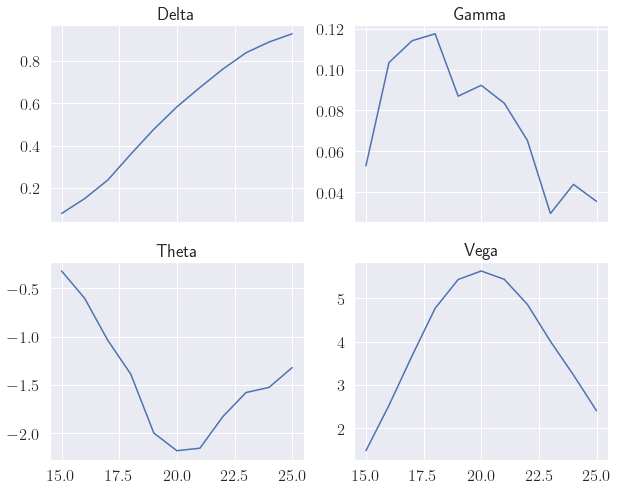

In [81]:
plt.figure()

fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(10,8),sharex=True)

sns.lineplot(x=s0_range, y=delta, ax=axs[0][0]).set(title='Delta')
sns.lineplot(x=s0_range, y=gamma, ax=axs[0][1]).set(title='Gamma')
sns.lineplot(x=s0_range, y=theta, ax=axs[1][0]).set(title='Theta')
sns.lineplot(x=s0_range, y=vega, ax= axs[1][1]).set(title='Vega')

In [1]:
greeks = pd.DataFrame(list(zip(price,delta,gamma,theta,vega,rho)),
                     index=np.arange(15,26,1),columns=['price','delta','gamma','theta','vega','rho'])
greeks

NameError: name 'pd' is not defined

## 4. Consider the following 2-factor model for stock prices with stochastic volatility:

                                                    Heston Model
\begin{equation}
  \left \{
  \begin{aligned}
    &dS_t = rS_td_t + \sqrt{V_t}S_tdW_t^1 &&  \\
    &dV_t = \alpha(\beta-V_t)d_t + \sigma \sqrt{V_t}dW_t^2 && 
  \end{aligned} 
  \right.
\end{equation} 

__Three Truncation Methods__

$\hat S _{k+1} = \hat S_k + r\hat S_k\Delta + \sqrt{f_3(\hat V_k)} \hat S_k\sqrt{\Delta}Z^1_{k+1}  $

$\hat V _{k+1} = f_1(\hat V_k) + \alpha(\beta-f_2(\hat V_k))\Delta + \sigma\sqrt{f_3(\hat V_k)}\sqrt{\Delta}Z^2_{k+1} $

| Scheme | $f_1$ | $f_2$ |$f_3$|
| --- | --- | --- |---|
| Reflection |$\left| x \right| $ |$\left| x \right| $ |$\left| x \right| $ |
| Partial Truncation | $x$ | $x$ | $x^+$ |
| Full Truncation | $x$ | $x^+$ | $x^+$ |

In [20]:
def twoD_Normal(path,rho):
    """
    Two-dimensional Normal
    """
    var_covar_matrix = np.array([[1,rho],[rho,1]])
    L = np.linalg.cholesky(var_covar_matrix)
    z1 = np.random.normal(0,1,path)
    z2 = np.random.normal(0,1,path)
    z = np.array([z1,z2])
    w1,w2 = L.dot(z)
    return w1,w2

def full_truc(arr):
    return np.array([i if i>0 else 0 for i in arr])

def twoFactor(r,s0,k,v0,rho,T,steps,trials,sigma,alpha,beta,truc_type):
    dt = T/steps
    v = [np.array([v0]*trials)]
    s = [np.array([s0]*trials)]
  
    for i in range(trials):
        w1,w2 = twoD_Normal(trials,rho)
        dw1 = np.sqrt(dt) * w1
        dw2 = np.sqrt(dt) * w2
        
        if truc_type.lower() == "full":
            vt = v.pop()
            vt_1 = vt + alpha*(beta-full_truc(vt))*dt + sigma*np.sqrt(full_truc(vt))*dw2
            st = s.pop()
            st_1 = st + r*st*dt + np.sqrt(full_truc(vt))*st*dw1
            v.append(vt_1)
            s.append(st_1)
            
        elif truc_type.lower() == "partial":
            vt = v.pop()
            vt_1 = vt + alpha*(beta-vt)*dt + sigma*np.sqrt(full_truc(vt))*dw2
            st = s.pop()
            st_1 = st + r*st*dt + np.sqrt(full_truc(vt))*st*dw1
            v.append(vt_1)
            s.append(st_1)
        
        elif truc_type.lower() == "reflection":
            vt = v.pop()
            vt_1 = abs(vt) + alpha*(beta-abs(vt))*dt + sigma*np.sqrt(abs(vt))*dw2
            st = s.pop()
            st_1 = st + r*st*dt + np.sqrt(abs(vt))*st*dw1
            v.append(vt_1)
            s.append(st_1)
            
    call_payoff = s[0] - k
    call_payoff = full_truc(call_payoff)
    call_price = np.mean(call_payoff)

    return call_price

In [21]:
price_t05_full = twoFactor(r=0.03,s0=48,k=50,v0=0.05,rho=-0.6,T=0.5,steps=1000,trials=1000,\
          sigma=0.42,alpha=5.8,beta=0.0625,truc_type='full')

price_t05_partial = twoFactor(r=0.03,s0=48,k=50,v0=0.05,rho=-0.6,T=0.5,steps=1000,trials=1000,\
          sigma=0.42,alpha=5.8,beta=0.0625,truc_type='partial')

price_t05_reflection = twoFactor(r=0.03,s0=48,k=50,v0=0.05,rho=-0.6,T=0.5,steps=1000,trials=1000,\
          sigma=0.42,alpha=5.8,beta=0.0625,truc_type='reflection')

price_t5_full = twoFactor(r=0.03,s0=48,k=50,v0=0.05,rho=-0.6,T=5,steps=1000,trials=1000,\
          sigma=0.42,alpha=5.8,beta=0.0625,truc_type='full')

price_t5_partial = twoFactor(r=0.03,s0=48,k=50,v0=0.05,rho=-0.6,T=5,steps=1000,trials=1000,\
          sigma=0.42,alpha=5.8,beta=0.0625,truc_type='partial')

price_t5_reflection = twoFactor(r=0.03,s0=48,k=50,v0=0.05,rho=-0.6,T=5,steps=1000,trials=1000,\
          sigma=0.42,alpha=5.8,beta=0.0625,truc_type='reflection')

In [22]:
T05 = [price_t05_full,price_t05_partial,price_t05_reflection]
T5 = [price_t5_full,price_t5_partial,price_t5_reflection]

ans = pd.DataFrame(list(zip(T05,T5)),index=['Full Truncation','Partial Truncation','Reflection'],columns=['T=0.5','T=5'])
ans

,T=0.5,T=5
Full Truncation,2.558547,14.670873
Partial Truncation,2.433621,15.148165
Reflection,2.814669,15.968595


## 5. The objective of this exercise is to compare a sample of Pseudo-Random numbers with a sample of Quasi-Monte Carlo numbers of 𝑈𝑛𝑖𝑓𝑜𝑟𝑚[0,1]𝑥[0,1]:

In [35]:
def halton_oneD(n,base):
    """
    One-dimensional Halton sequence 
    (the code is adopted from Brandimarte’s “Numerical methods in finance and economics: 
    a MATLAB-based introduction”)
    
    """
    sequence = np.zeros(n)
    numbits = int(1 + np.ceil(np.log(n)/np.log(base)))
    VetBase = [1/base**(i+1) for i in range(numbits)]
    WorkVet = np.zeros(numbits)
    for i in range(n):
        j=0
        ok = 0
        while ok==0:
            WorkVet[j] = WorkVet[j]+1
            if WorkVet[j] < base:
                ok = 1
            else:
                WorkVet[j] = 0
                j = j+1
        sequence[i] = np.dot(WorkVet,VetBase)
        
    return sequence

### a) Generate 100 2-dimensional Uniform [0,1]x[0,1] vectors by using any one of the algorithms for random number generation.

In [36]:
def LGM(x,n):
    '''
    x: initial value
    n: number of random variables to generate
    '''
    m=2**31-1
    a=7**5
    b=0

    LGM_rm=[]

    for i in range(n):
        x = (a*x+b) % m
        LGM_rm.append(x/m)
        
    return LGM_rm

In [37]:
rv = LGM(1,200)
l1 = rv[:100]
l2 = rv[100:]
vector_a = list(zip(l1,l2))

### b) Generate 100 points of the 2-dimensional Halton sequences, using bases 2 and 7.

In [38]:
b_base2 = halton_oneD(100,2)
b_base7 = halton_oneD(100,7)
vector_b = list(zip(b_base2,b_base7))

### c) Generate 100 points of the 2-dimensional Halton sequences, using bases 2 and 4. (Note: 4 is a non- prime number!)

In [39]:
c_base2 = halton_oneD(100,2)
c_base4 = halton_oneD(100,4)
vector_c = list(zip(c_base2,c_base4))

### d) Draw all 3 sequences of random numbers on separate graphs. Are there differences in the three sets (visual test only)? Comment on your observations.

In [ ]:
plt.figure()
plt.rcParams["figure.figsize"] = (20,6)

fig, axs = plt.subplots(ncols=3)
sns.scatterplot(x=l1, y=l2, ax=axs[0],s=100).set(title='LGM')
sns.scatterplot(x=b_base2,y=b_base7,ax=axs[1],s=100).set(title='base 2 and 7')
sns.scatterplot(x=c_base2,y=c_base4,ax=axs[2],s=100).set(title='base 2 and 4')
plt.legend(markerscale=2)

### e) Use 2-dimensional Halton sequences to compute the following integral:

 $I = \int^{1}_{0} \int^{1}_{0} e^{-xy}(\sin 6\pi x+ \cos ^{\frac{1}{3}}2\pi y)dxdy$ , Use N=10,000 in your simulations. Try different couples for bases: (2,4), (2,7), (5,7).

In [29]:
def integral(base1,base2):
    """
    return integral number base on two different bases
    """
    N =10000
    x = halton_oneD(N,base1)
    y = halton_oneD(N,base2)
    
    val = []
    for i in range(N):
        c = np.cos(2*np.pi*y[i])
        v = np.exp(-x[i]*y[i])*(np.sin(6*np.pi*x[i]) +modify_negative_num(c,3))
        val.append(v)
    return val

In [30]:
I24 = np.mean(integral(2,4))
I27 = np.mean(integral(2,7))
I57 = np.mean(integral(5,7))

NameError: name 'halton_oneD' is not defined

In [ ]:
base_pair = ['2,4','2,7','5,7']
Iresult = pd.DataFrame(list(zip(base_pair,[I24,I27,I57])),columns=['Base','Integral Value'])
Iresult
